# Py-ML-App (Like R_Shining??) to Predict House Pricing 
## Input:
    - Basic: Housing Datasets
    - Improvement: 1.When do you want to sale it? 
                   2.House Key parameter Inputs
                   3.House Address
    
## ML-Algorithm: Try Decesion Tree Regressor, Random Forest Regressor, XGBoosting Reg
    -Validation
    -Tuning
    -Pipline
## Output:
    - Basic :Predict Price datasets 
    - Improvement Idea1: Put it on visusal
    - Improvement Idea2: input key attributes and predict pricing
    - Improvement Idea3: Input address-> API/REST got attributes-> feed in model pipeline-> spit Price prediction 

In [ ]:
#Datasets
#URL: AmesHousing,target.csv,test.csv, train.csv

# https://www.kaggle.com/marcopale/housing?select=train.csv
#    https://www.kaggle.com/marcopale/housing?select=test.csv
#        https://www.kaggle.com/marcopale/housing?select=target.csv
#            https://www.kaggle.com/marcopale/housing?select=AmesHousing.csv

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor #Model1(Simple Supervise Learning Decision Tree)
from sklearn.ensemble import RandomForestRegressor #Model2-Ensemble Learning (Bagging)
import xgboost as xgb #Model3--Ensemble Learning (Boosting)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


# Path of the file to read
#iowa_file_path = 'https://www.kaggle.com/marcopale/housing?select=train.csv'

home_data = pd.read_csv('train.csv')

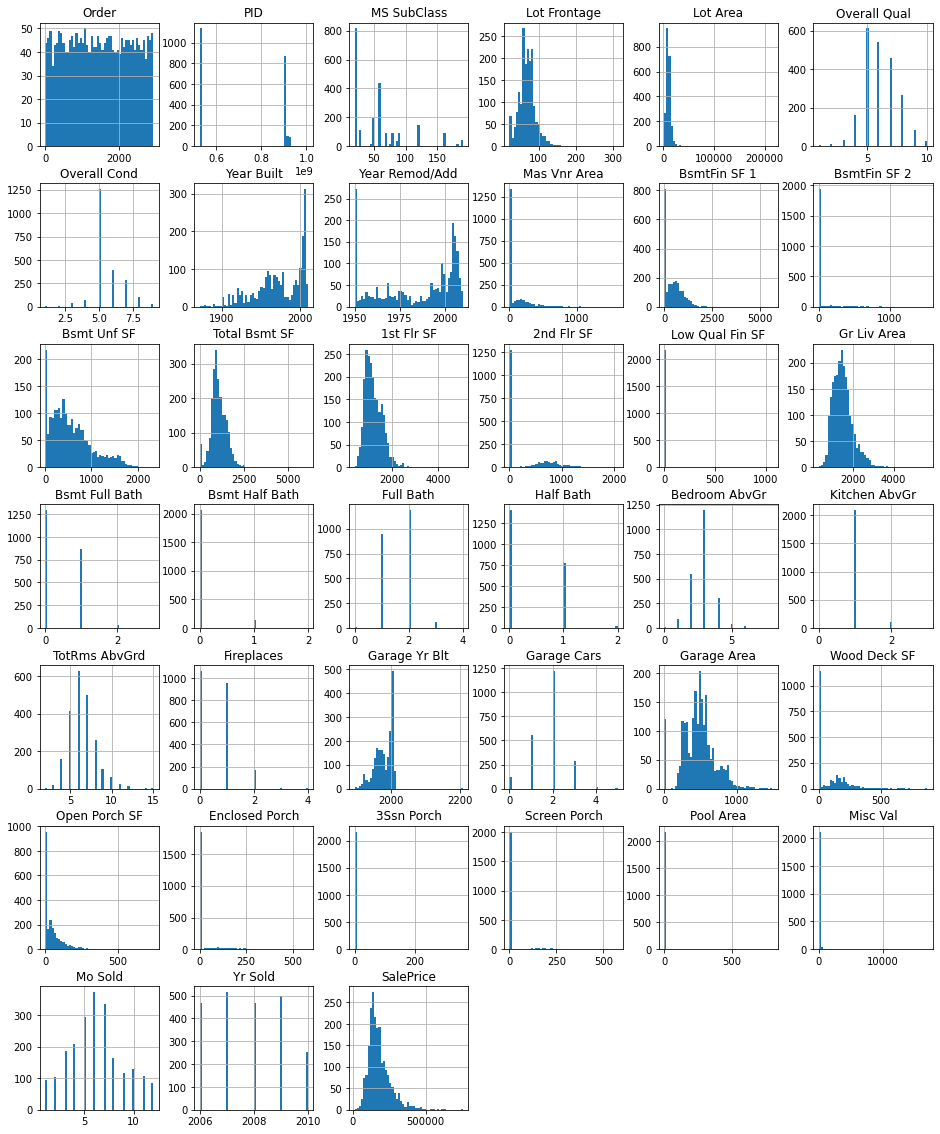

In [62]:
#EDA1: Bsics
home_data.columns
#home_data.info()
#home_data.describe #home_data['SalePrice'].describe()

#visulize EDA:
#plt.figure(figsize=9,8)
#sns.distplot(home_data['SalePrice'],color='g', bins=100, hist_kws={'alpha':0.4});
df_num=home_data.select_dtypes(include=['float64','int64'])
df_num.head()
df_num.hist(figsize=(16,20),bins=50);



In [63]:
#EDA2 : strong connection with price
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799928
Gr Liv Area       0.699675
Garage Cars       0.644091
Garage Area       0.637427
Total Bsmt SF     0.629263
1st Flr SF        0.619164
Year Built        0.559975
Full Bath         0.547815
Year Remod/Add    0.531341
Garage Yr Blt     0.518554
Mas Vnr Area      0.513758
Name: SalePrice, dtype: float64


[15:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


NameError: name 'plt' is not defined

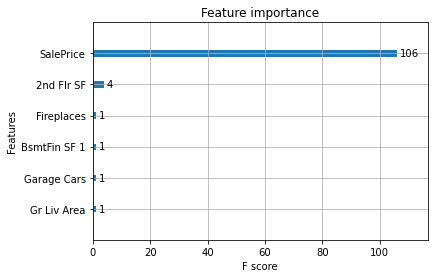

In [67]:
X=df_num
y=df_num['SalePrice']
#import ggplot2 as plt
#EDA What feature arae most important in my dataset
# Create the DMatrix: housing_dmatrix 
housing_dmatrix = xgb.DMatrix(data=X, label=y) 

# Create the parameter dictionary: params 
params = {"objective":"reg:linear", "max_depth":4} 

# Train the model: xg_reg 
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10) 

# Plot the feature importances 
xgb.plot_importance(xg_reg) 
plt.show() 

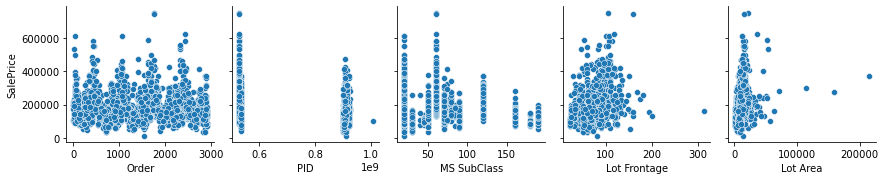

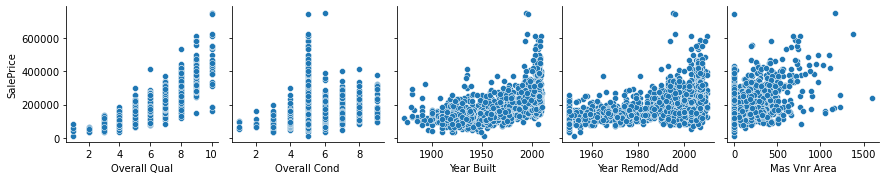

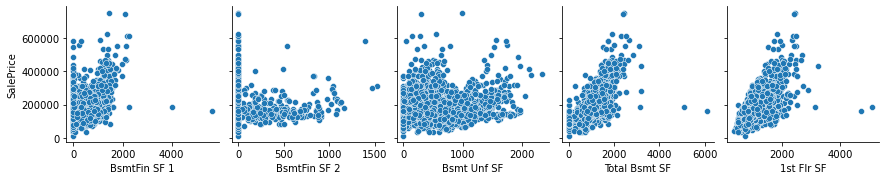

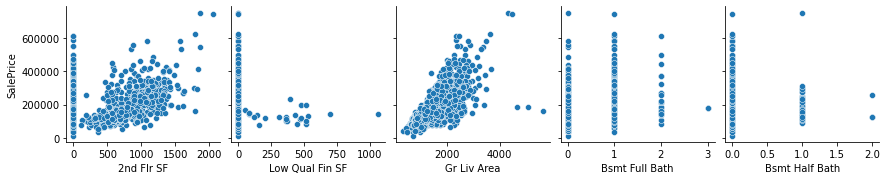

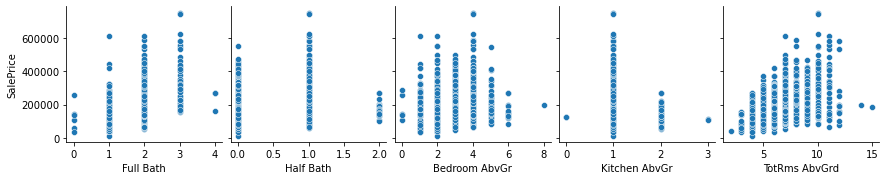

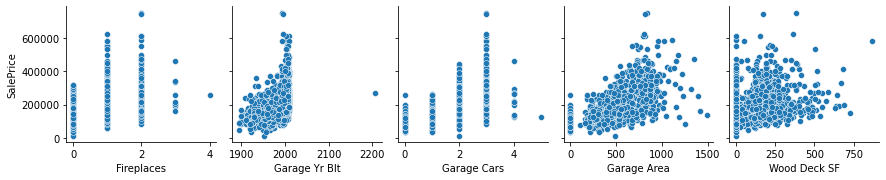

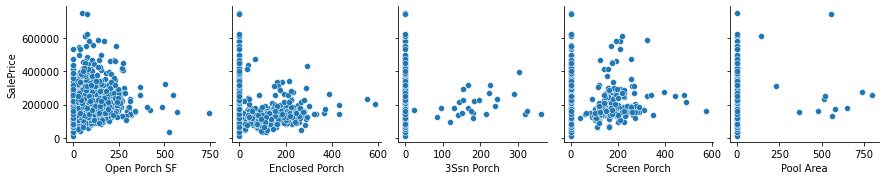

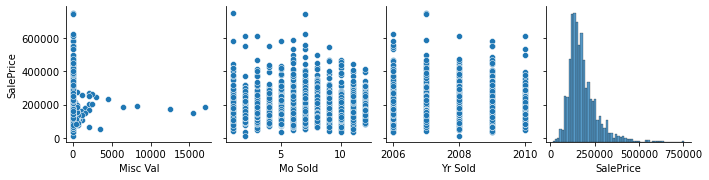

In [130]:


#EDA3: Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:
#Plot the numerical features and see which ones have very few or explainable outliers
#Remove the outliers from these features and see which one can have a good correlation without their outliers
import seaborn as sns
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [126]:
#EDA4 :Pick up the golden element
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))
    
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

      Pool Area: -0.3126146719341445
            PID: -0.26073920485899155
  Kitchen AbvGr: -0.13359254755439023
   Overall Cond: -0.09889045380786506
    MS SubClass: -0.0940829794752177
      Half Bath: -0.07248618133682778
          Order: -0.04082780633751415
        Yr Sold: -0.02483273150243697
 Bsmt Half Bath: -0.001134241747429689
Low Qual Fin SF: 0.002861614820848402
        Mo Sold: 0.035575013774327785
 Bsmt Full Bath: 0.03776411504891121
  Open Porch SF: 0.08390285077443865
    Bsmt Unf SF: 0.1341311318381225
     Fireplaces: 0.1358135681720425
  Bedroom AbvGr: 0.14756057714525822
       Misc Val: 0.15515700345255048
   Screen Porch: 0.15799190217900605
   Wood Deck SF: 0.1862023521232305
 Enclosed Porch: 0.23642056109592602
     3Ssn Porch: 0.23859164932870475
       Lot Area: 0.2693210355060212
   BsmtFin SF 2: 0.304382282353236
   Lot Frontage: 0.36190406738836955
   Mas Vnr Area: 0.4479765777609844
  TotRms AbvGrd: 0.4863745955039656
   BsmtFin SF 1: 0.5035336873199278


In [ ]:
#EDA more
#https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

In [ ]:

#Basic Steps : Complete process of submit complete result on Kaggle

##Step1: run simple testing 
        import pandas as pd
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.metrics import mean_absolute_error
        from sklearn.model_selection import train_test_split

        home_data = pd.read_csv('train.csv')
        y = home_data.SalePrice
        feature_columns = ['Pool Area', 'Year Built', '1st Flr SF', '2nd Flr SF','Full Bath','Bedroom AbvGr','TotRms AbvGrd']
        X = home_data[feature_columns]

        # Specify Model
        rf_model_on_full_data = RandomForestRegressor()
        # Fit Model
        rf_model_on_full_data.fit(X, y)

##Step2: Run Internal split and result checking,Tuning, Try different models
        # Split into validation and training data
        train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

        # Define a random forest model
        rf_model = RandomForestRegressor(random_state=1)
        rf_model.fit(train_X, train_y)
        rf_val_predictions = rf_model.predict(val_X)
        rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

        print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

##Step3: using Model on provide testing set: 
# path to file you will use for predictions
        test_data_path = 'test.csv'

        # read test data file using pandas
        test_data = pd.read_csv(test_data_path)

        # create test_X which comes from test_data but includes only the columns you used for prediction.
        # The list of columns is stored in a variable called features
        test_X = test_data[feature_columns]
        # make predictions which we will submit. 
        test_preds =rf_model_on_full_data.predict(test_X)
        
##Step4: Output file generation and submitt
        # Run the code to save predictions in the format used for competition scoring
        output = pd.DataFrame({'Id': test_data.Id,
                               'SalePrice': test_preds})
        output.to_csv('submission.csv', index=False)

In [59]:
##Step1:
# Path of the file to read
#iowa_file_path = 'https://www.kaggle.com/marcopale/housing?select=train.csv'

#home_data = pd.read_csv('train.csv')
y = home_data.SalePrice
feature_columns = ['Pool Area', 'Year Built', '1st Flr SF', '2nd Flr SF','Full Bath','Bedroom AbvGr','TotRms AbvGrd']
X = home_data[feature_columns]

# Specify Model
iowa_model = DecisionTreeRegressor()
# Fit Model
iowa_model.fit(X, y)

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

First in-sample predictions: [159000. 271900. 137500. 248500. 167000.]
Actual target values for those homes: [159000, 271900, 137500, 248500, 167000]


In [6]:
##Step2: Split Train and Test  and try different models
# fill in and uncomment
train_X, val_X, train_y, val_y =train_test_split(X,y,random_state=1)

In [7]:
##Step2: Model1: Decision Tree Regressor and View Results
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X,train_y)
val_predictions = iowa_model.predict(val_X)
    # print the top few validation predictions
print(val_predictions[:5])
    # print the top few actual prices from validation data
print(val_y[:5])

[177500.  37900. 117000. 127500. 136000.]
2145    136000
306      80900
2167    139000
854     168000
439     148000
Name: SalePrice, dtype: int64


In [13]:
##Step2: Model1: Decision Tree Regressor Validation 
val_mae =  mean_absolute_error(val_y,val_predictions)
# uncomment following line to see the validation_mae
print("MAE Validation:", val_mae)
rmse=np.sqrt(mean_squared_error(val_y,val_predictions))
print("RMSE Validation:", rmse)

MAE Validation: 30584.04848484849
RMSE Validation: 48344.034881865104


In [ ]:
##Step2: Model1: Decision Tree Regressor Hyperparameter Tuning: -MaxDepth

In [14]:
##Step2: Model1:-Tuning
#Above model has been built but error is too big. 
#Step1： Tuning -First prepare to see MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [15]:
##Step2: Model1:-Tuning
#Above model has been built but error is too big. 
#Step1： Tuning -First prepare to see RMSE
def get_rmse(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    rmse=np.sqrt(mean_squared_error(val_y, preds_val))
    return(rmse)

In [18]:
##Step2: Model1:-Tuning
#Tuning Step2: MAE and RMSE
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for nodes in candidate_max_leaf_nodes:
     my_mae=get_mae(nodes, train_X, val_X, train_y, val_y),
     print(nodes, my_mae)

for nodes in candidate_max_leaf_nodes:
     my_rmse=get_rmse(nodes, train_X, val_X, train_y, val_y),
     print(nodes, my_rmse)
    
scores1= {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size1 = min(scores1, key=scores1.get)
scores2= {leaf_size: get_rmse(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size2 = min(scores2, key=scores2.get)
#print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(min(my_mae)))
print("Best Tree Size for MAE Validation: {:,.0f}".format(best_tree_size1))
print("Best Tree Size for RMSE Validation: {:,.0f}".format(best_tree_size2))


5 (36533.97234129638,)
25 (28698.039907679104,)
50 (27762.39661712396,)
100 (27999.479969069707,)
250 (28743.778659745072,)
500 (29248.987696229382,)
5 (53411.933813641015,)
25 (43631.44590698776,)
50 (44961.88125487114,)
100 (45647.12122273051,)
250 (46457.12532006813,)
500 (47259.90472056242,)
Best Tree Size for MAE Validation: 50
Best Tree Size for RMSE Validation: 25


In [20]:
##Step2: Model1:-Tuning-Maxdepth of Tree
#Model1 Try: Now we have our best tree size for DTR -Decision Tree Regressor
# Fill in argument to make optimal size and uncomment
dtr_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size1, random_state=1)

# fit the final model and uncomment the next two lines
dtr_model.fit(train_X, train_y)

val_pred=dtr_model.predict(val_X)
val_mae =  mean_absolute_error(val_y,val_pred)
val_rmse =  np.sqrt(mean_squared_error(val_y, val_pred))

print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))
print("Validation RMSE for best value of max_leaf_nodes: {:,.0f}".format(val_rmse))

Validation MAE for best value of max_leaf_nodes: 28,698
Validation RMSE for best value of max_leaf_nodes: 43,631


In [34]:
#Model2 Try: Using rfRegressor- Ensemble Learning (Bagging)
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)
val_pred=rf_model.predict(val_X)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y,val_pred)
rf_val_rmse= np.sqrt(mean_squared_error(val_y, val_pred))

print("RF Model Validation MAE for Random Forest Model: {}".format(rf_val_mae))
print("RF Model Validation RMSE for Random Forest Model: {}".format(rf_val_rmse))
print("Is the Radom Forest Regressor Model esult better even before tuning?")

RF Model Validation MAE for Random Forest Model: 23858.678632770567
RF Model Validation RMSE for Random Forest Model: 38703.89987427086
Is the Radom Forest Regressor Model esult better even before tuning?


In [39]:
#Model3 Try； XGboostRegressor(Extrem Gradient Boosting- Ensemble Learning)
#ML-5-2-1:  https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/fine-tuning-your-xgboost-model?ex=1

xg_reg=xgb.XGBRegressor(objective='reg:linear',n_estimators=10,seed=123)
xg_reg.fit(train_X, train_y)
preds=xg_reg.predict(val_X)


xgb_val_mae = mean_absolute_error(val_y,preds)
xgb_val_rmse= np.sqrt(mean_squared_error(val_y, preds))
print("XGB Model Validation MAE for Random Forest Model: {}".format(xgb_val_mae))
print("XGB Model Validation RMSE for Random Forest Model: {}".format(xgb_val_rmse))
print("Is the XGBoosting Regressor Model result better even Untuned?")


[12:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
XGB Model Validation MAE for Random Forest Model: 24715.418629261363
XGB Model Validation RMSE for Random Forest Model: 39493.84904876466
Is the XGBoosting Regressor Model result better even Untuned?


In [45]:
#Tuning Model3: Tuning1: Regularization -leaf weights
#L1(alpha), L2(lambda) 
dm=xgb.DMatrix(data=X, label=y)
params={"objecive":"reg:linear","max_depth":4}
l1_params=[1,10,100]
rmses_l1=[]
for reg in l1_params:
        params["lambda"]=reg
        cv_results=xgb.cv(dtrain=dm,params=params,nfold=4,num_boost_round=10,metrics="rmse", as_pandas=True, seed=123)
        rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
print("Best rmse as a function l1:")
print(pd.DataFrame(list(zip(l1_params, rmses_l1)),columns=["l1","rmse"]))

[12:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objecive" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objecive" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objecive" } might not be used.

  This may not be accurate due to some parameters are only used in language

In [47]:
# Random Search
# Create the parameter grid: gbm_param_grid  
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = { 

    'n_estimators': [25], 

    'max_depth':np.arange(2, 12) 

} 

# Instantiate the regressor: gbm 

gbm = xgb.XGBRegressor(n_estimators=10) 

# Perform random search: grid_mse 

randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid,n_iter=5,cv=4,scoring="neg_mean_squared_error",verbose=1) 

# Fit randomized_mse to the data 

randomized_mse.fit(X,y) 

# Print the best parameters and lowest RMSE 

print("Best parameters found: ", randomized_mse.best_params_) 

print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_))) 

 

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.0s finished


Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  33511.61241748777


In [51]:
# Create the parameter grid: gbm_param_grid 
from sklearn.model_selection import GridSearchCV
gbm_param_grid = { 

    'colsample_bytree': [0.3, 0.7], 

    'n_estimators': [50], 

    'max_depth': [2,5] 

} 

# Instantiate the regressor: gbm 

gbm =xgb.XGBRegressor() 

# Perform grid search: grid_mse 

grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring="neg_mean_squared_error",cv=4,verbose=1) 

# Fit grid_mse to the data 

grid_mse.fit(X, y) 

# Print the best parameters and lowest RMSE 

print("Best parameters found: ", grid_mse.best_params_) 

print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_))) 


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  33999.6813452614


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.7s finished


In [58]:
#pipline ML-5-4 Pipeline
xgb_pipeline=Pipeline[("St_scaler",StandardScaler()),("xgb_model",xgb.XGBRegressor())]
gbm_param_grid={'xgb_model__subsample':np.arange(.05,1,.05),'xgb_model__max_depth':np.arange(3,20,1),'xgb_model__colsample_bytree':np.arange(.1,1.05,.05)}
randomized_neg_mse=RandomizedSearchCV(estimator=xgb_pipepline,para_distributions=gbm_param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=4)
randomized_neg_mse.fit(X,y)
print("Best rmse: ",np.sqrt(np.abs(randomized_neg_mse.best_score_)))
print("Bests model:  ", randomized_neb_mse.best_estimator_)

TypeError: 'ABCMeta' object is not subscriptable